# Student Grade Prediction Model

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')

In [5]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


Columns Description- total 43 columns

-Seat No : The enrolled number of candidate that took the exams

-CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam.

In [8]:
#checking the shape of dataset
df.shape

(571, 43)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

from above we can see that there are some null values present, now we will check how many null values are there.

In [9]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

<AxesSubplot:>

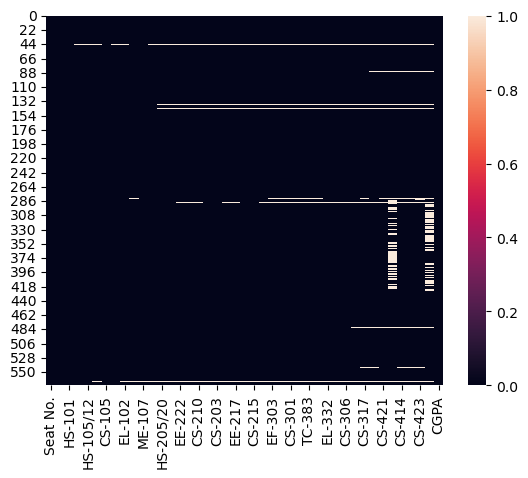

In [10]:
#visualizing using heatmap
sns.heatmap(df.isnull())

we can see maximun number of columns has null values in it.. so we have to treat the null values.

In [16]:
df['PH-121'].unique()

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

As this is a statement of grades so we will treat null values as absentees hence we will allot F grade for null values as CGPA is still calculated for those students.

In [18]:
df = df.fillna('F')

In [19]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

As we can see we have removed all the missing values rom our dataset, so now our data is cleaned.
Now we are dropping the Seat no. column as its not necessary for predicting.

In [20]:
df=df.drop(['Seat No.'],axis=1)

Now we will encode the data with Ordinal Encoder

In [21]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [22]:
df.iloc[:,:-1]

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C,C-,C-,C-,C-,A-,A,C-,B,A-
1,A,D,D+,D,B-,C,D,A,D+,D,...,D,D+,D,C,D,A-,B-,C,C,B
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A-,B,B,A,C,A,A,A,A-,A
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,C-,D+,C,D+,C-,B-,B,C+,C+,C+
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A-,B-,B+,B+,B-,A-,A,A-,A-,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,B+,A-,A-,A,A,A,B+,B+,B,A
567,A+,A,A,A,A,A,A,A-,A,A,...,A-,B+,B+,A,A,A-,B,A-,C,A-
568,B,A,A-,B+,A,A,A,A,A,B,...,B+,A-,B,A,B+,A,C,B+,A-,A-
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,B+,D,B,B,C-,D,C,B,B-,C


In [23]:
df.iloc[:,:-1]=oe.fit_transform(df.iloc[:,:-1])

In [24]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,2.193


In [25]:
#checking the types of data 
df.dtypes

PH-121       float64
HS-101       float64
CY-105       float64
HS-105/12    float64
MT-111       float64
CS-105       float64
CS-106       float64
EL-102       float64
EE-119       float64
ME-107       float64
CS-107       float64
HS-205/20    float64
MT-222       float64
EE-222       float64
MT-224       float64
CS-210       float64
CS-211       float64
CS-203       float64
CS-214       float64
EE-217       float64
CS-212       float64
CS-215       float64
MT-331       float64
EF-303       float64
HS-304       float64
CS-301       float64
CS-302       float64
TC-383       float64
MT-442       float64
EL-332       float64
CS-318       float64
CS-306       float64
CS-312       float64
CS-317       float64
CS-403       float64
CS-421       float64
CS-406       float64
CS-414       float64
CS-419       float64
CS-423       float64
CS-412       float64
CGPA         float64
dtype: object

In [26]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.917688,4.260946,3.928196,2.838879,4.154116,3.991243,3.919440,4.810858,...,4.246935,4.961471,3.663748,5.553415,4.323993,2.647986,4.061296,4.187391,4.294221,2.954888
std,3.046895,2.785317,2.981561,3.208027,3.015764,2.696709,2.754402,3.057621,2.693167,3.163269,...,3.457050,2.879800,3.128656,2.821944,3.705629,2.782226,2.592450,2.980919,3.534931,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,4.000000,3.000000,5.000000,...,4.000000,5.000000,3.000000,5.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.029000
75%,6.000000,7.000000,5.000000,7.000000,6.000000,4.000000,6.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,6.000000,8.000000,7.000000,4.000000,5.000000,6.000000,6.000000,3.451000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,12.000000,12.000000,...,13.000000,11.000000,11.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


From above points we see that-

There may be some skewness present in the data as mean and median(50%) has some difference between them but as its categorical data we will not remove it.
There may be some outliers present as 75% and maximum values have a difference but again we will not remove them as its categorical data

## Data Visualisation 

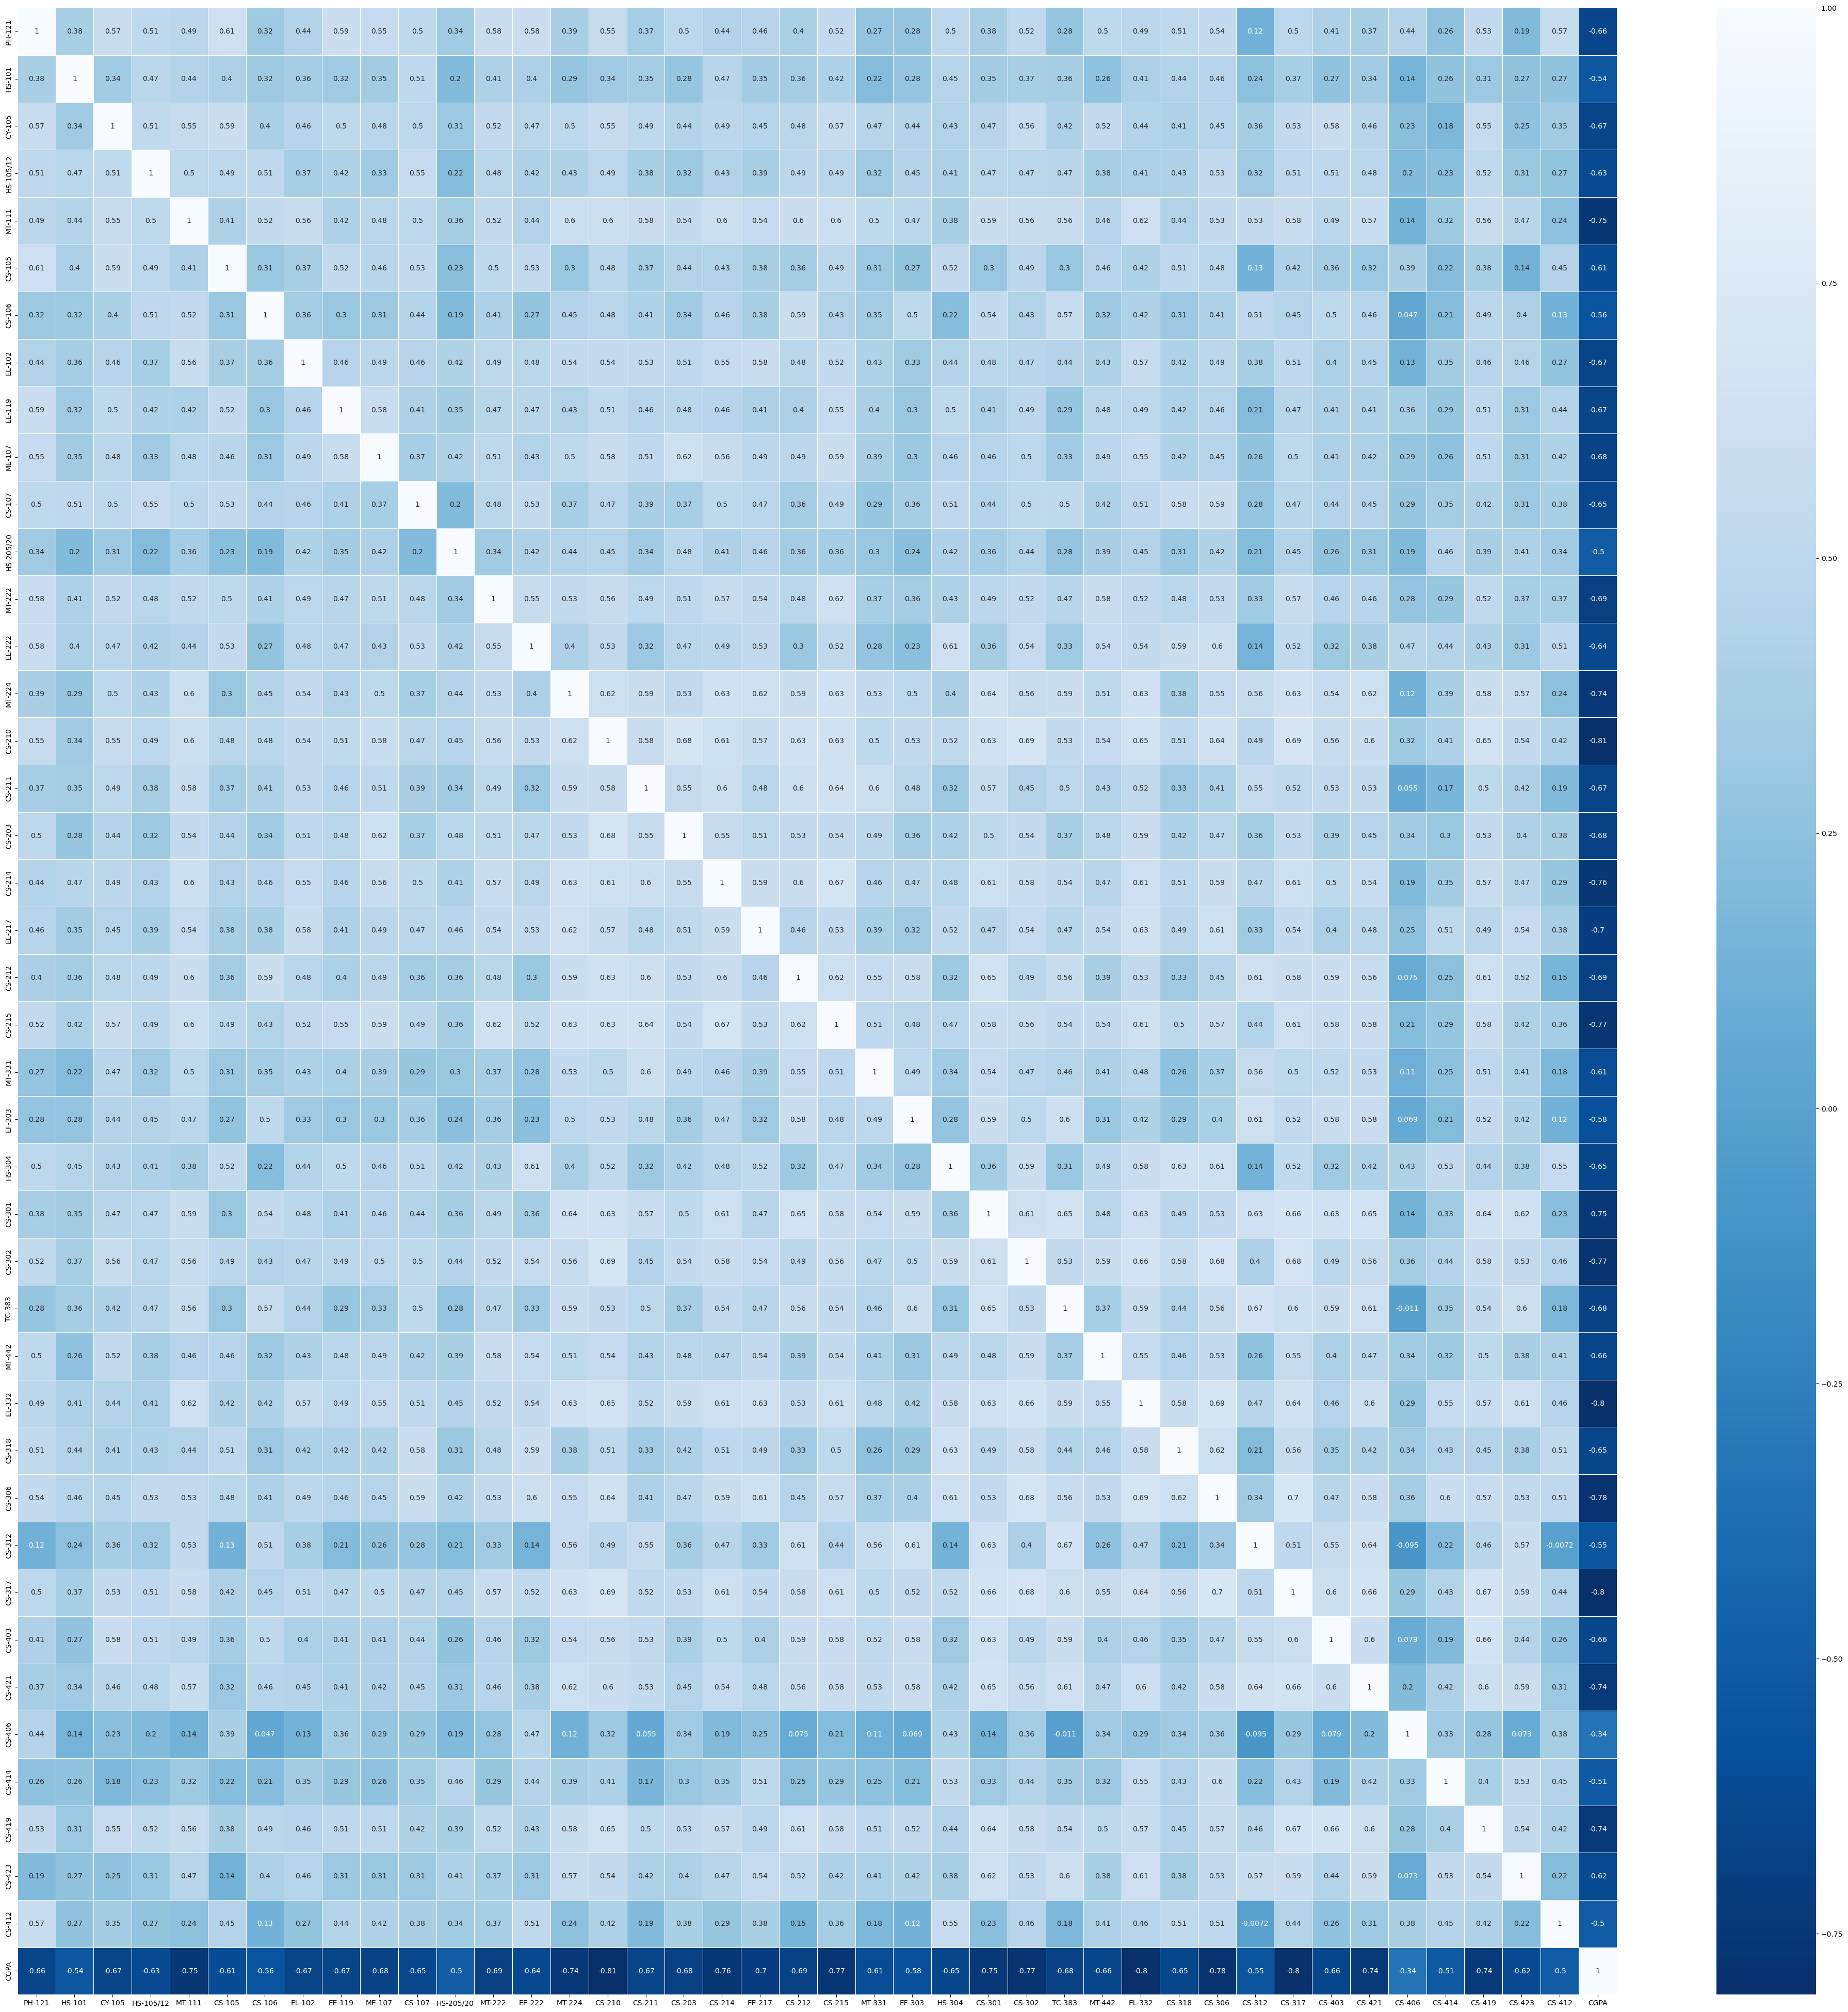

In [29]:
#plotting a heatmap for visualizing the correlation between features and label
plt.figure(figsize=(50, 50))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, cmap='Blues_r')
plt.show()

From the correlation heatmap we can see that there is a negative correlation between CGPA and all the features.

In [30]:
df.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.382436,0.565781,0.507696,0.486108,0.609990,0.316341,0.441392,0.590282,0.547779,...,0.120731,0.498693,0.410585,0.373229,0.443387,0.257244,0.530977,0.191697,0.568114,-0.663135
HS-101,0.382436,1.000000,0.335341,0.474028,0.441725,0.400713,0.320990,0.359132,0.323289,0.345225,...,0.242666,0.371732,0.265502,0.336884,0.140012,0.260447,0.312083,0.265249,0.265127,-0.537170
CY-105,0.565781,0.335341,1.000000,0.513804,0.551314,0.587696,0.398464,0.461587,0.500810,0.484401,...,0.359239,0.532915,0.577793,0.464361,0.225834,0.181554,0.545839,0.254401,0.347033,-0.669816
HS-105/12,0.507696,0.474028,0.513804,1.000000,0.502434,0.492788,0.512453,0.369392,0.424599,0.333695,...,0.324957,0.511731,0.511119,0.478193,0.196240,0.232226,0.518484,0.307307,0.269522,-0.626721
MT-111,0.486108,0.441725,0.551314,0.502434,1.000000,0.414055,0.523429,0.563668,0.419849,0.477460,...,0.525378,0.579642,0.488315,0.571791,0.139136,0.316264,0.557069,0.465576,0.240939,-0.754021
CS-105,0.609990,0.400713,0.587696,0.492788,0.414055,1.000000,0.307563,0.374514,0.522398,0.464715,...,0.130736,0.420289,0.362033,0.315126,0.390064,0.222983,0.381599,0.135145,0.446123,-0.613169
CS-106,0.316341,0.320990,0.398464,0.512453,0.523429,0.307563,1.000000,0.360123,0.301324,0.313438,...,0.509483,0.453052,0.504190,0.461192,0.046665,0.212901,0.486369,0.403949,0.125788,-0.560423
EL-102,0.441392,0.359132,0.461587,0.369392,0.563668,0.374514,0.360123,1.000000,0.461803,0.487033,...,0.377792,0.510218,0.403340,0.447677,0.133412,0.350020,0.463966,0.456172,0.270819,-0.666859
EE-119,0.590282,0.323289,0.500810,0.424599,0.419849,0.522398,0.301324,0.461803,1.000000,0.575850,...,0.214504,0.470555,0.409454,0.413542,0.362994,0.292626,0.513312,0.312852,0.441268,-0.668793
ME-107,0.547779,0.345225,0.484401,0.333695,0.477460,0.464715,0.313438,0.487033,0.575850,1.000000,...,0.262890,0.499925,0.413866,0.415823,0.285714,0.257346,0.508011,0.306103,0.422639,-0.676874


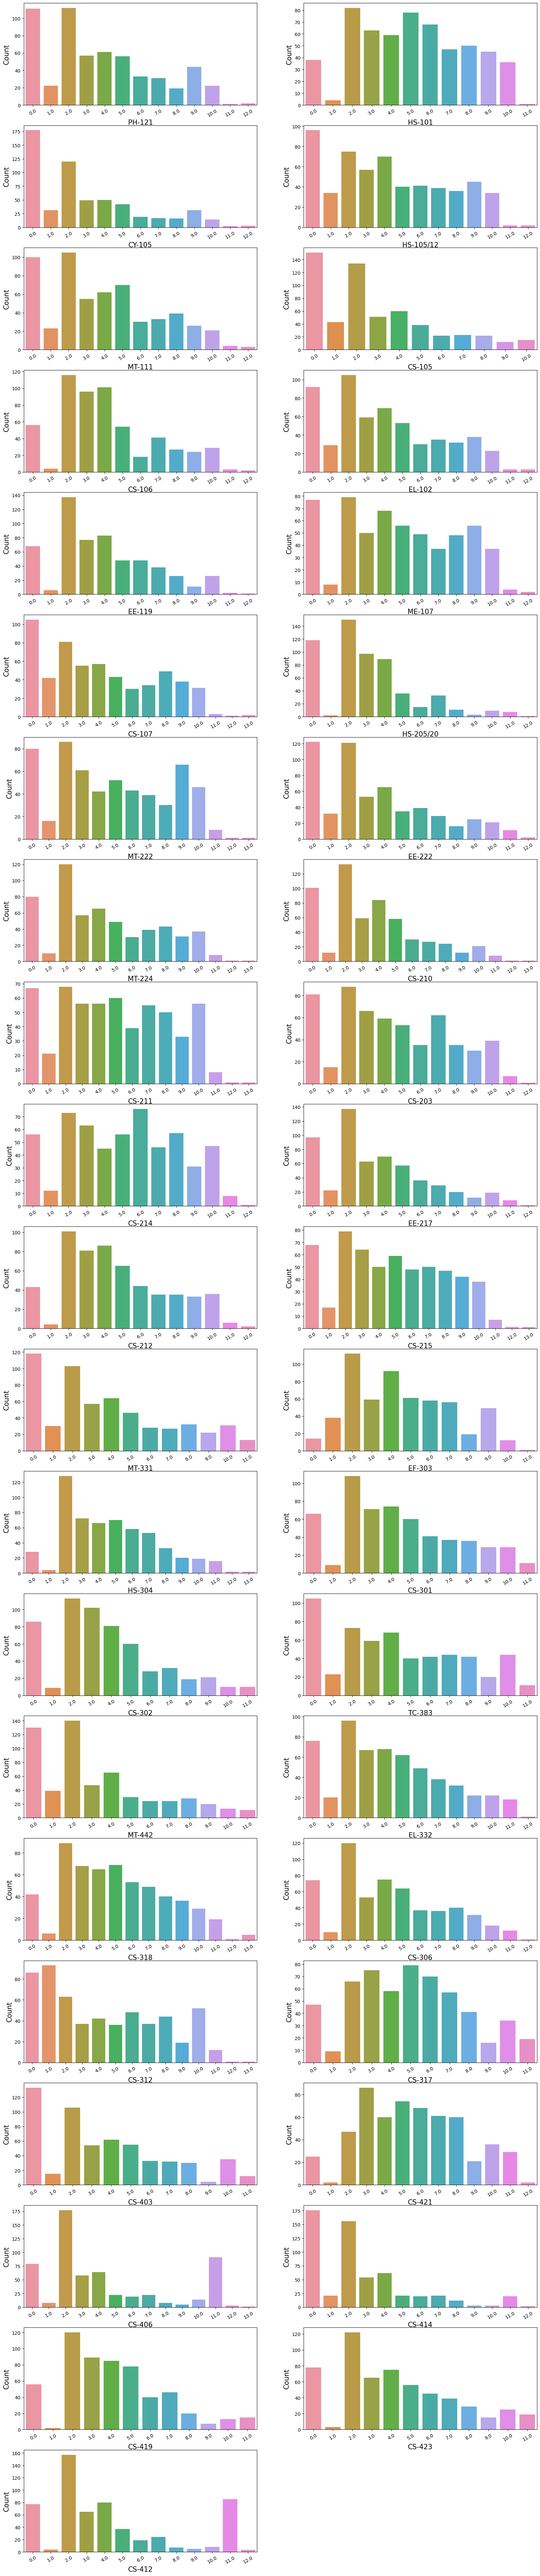

In [33]:
# Visualizing the dataset by using countplot

plt.figure(figsize=(20,100))
num = 1

for i in df.columns[0:41]:
    if num <=41:
        st = plt.subplot(21,2,num)
        sns.countplot(data=df,x=i)
        plt.xlabel(i,fontsize=15)
        plt.xticks(fontsize=10)
        plt.xticks(rotation= 30)
        plt.yticks(fontsize=10)
        plt.ylabel('Count',fontsize=15)
    
    num +=1
plt.show()

## Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [35]:
x=df.drop(['CGPA'],axis=1)
y=df['CGPA']

In [36]:
scaled_x=sc.fit_transform(x)
scaled_x

array([[ 0.40040198,  1.77089951,  1.7060756 , ...,  1.52063004,
        -0.39867967, -0.6495833 ],
       [-1.24205154,  1.4115592 ,  2.37745339, ...,  0.74848264,
         0.60860392, -0.36644432],
       [-1.24205154, -0.74448263, -0.97943555, ..., -1.56795956,
        -0.73444087, -1.21586126],
       ...,
       [-0.25657943, -1.82250355, -0.30805776, ..., -0.02366476,
        -0.73444087, -0.6495833 ],
       [-1.24205154, -0.38514232,  2.0417645 , ..., -0.40973846,
         0.27284273,  0.48297262],
       [ 0.72889268,  1.4115592 ,  2.0417645 , ..., -0.02366476,
         1.61588752,  1.04925058]])

## Model Training

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [40]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = .25, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.9773118807513144 on Random State: 23


So the best random state is 23

In [41]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.25,random_state=23)

In [42]:
models=[LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(), SVR()]

In [43]:
for m in models:
    m.fit(x_train,y_train)
    mpred=m.predict(x_test)
    print('For',m)
    print("R2 score :",r2_score(y_test, mpred))
    print("Mean absolute error: ", mean_absolute_error(y_test,mpred))
    print("Mean squared error: ", mean_squared_error(y_test,mpred),'\n')

For LinearRegression()
R2 score : 0.9773118807513144
Mean absolute error:  0.07415040250914927
Mean squared error:  0.009542641941722474 

For RandomForestRegressor()
R2 score : 0.9500060697985636
Mean absolute error:  0.1093310489510489
Mean squared error:  0.02102748887832165 

For KNeighborsRegressor()
R2 score : 0.9635157288765976
Mean absolute error:  0.09399300699300693
Mean squared error:  0.015345314965034955 

For DecisionTreeRegressor()
R2 score : 0.8674617156992798
Mean absolute error:  0.16737762237762235
Mean squared error:  0.05574571328671328 

For SVR()
R2 score : 0.9770135518931524
Mean absolute error:  0.07061676300913619
Mean squared error:  0.009668119309111035 



We can observe that Linear Regression and SVR gives us the best R2 score

In [44]:
#Cross Validation
for m in models:
    cvs=cross_val_score(m,scaled_x,y)
    print('For',m,'\n',cvs)
    print(cvs.mean(),'\n')

For LinearRegression() 
 [0.95916971 0.88123024 0.96119751 0.95812176 0.95357477]
0.9426587975167289 

For RandomForestRegressor() 
 [0.95706    0.88882908 0.95255401 0.93760315 0.93724322]
0.9346578927360538 

For KNeighborsRegressor() 
 [0.95325724 0.86776504 0.95809864 0.95978154 0.9397712 ]
0.9357347337189326 

For DecisionTreeRegressor() 
 [0.79449935 0.77088309 0.90283422 0.81498495 0.76178921]
0.8089981646475364 

For SVR() 
 [0.97398697 0.94843346 0.96808077 0.96101511 0.95765283]
0.9618338295007822 



So we can easily see our best model is SVR Regression

In [60]:
svr=SVR()
final_model=svr.fit(x_train, y_train)
fmod_pred = svr.predict(x_test)
fmod_acc = (r2_score(y_test, fmod_pred))*100
print('Accuracy of our best model is:',fmod_acc)

Accuracy of our best model is: 97.70135518931524
